In [1]:
import pandas as pd

In [13]:
df = pd.read_csv("pa100k_gender_misclassified_df.csv")
print(df.shape)
print(df["true_label"].value_counts())

(179, 2185)
male      92
female    87
Name: true_label, dtype: int64


In [14]:
concept = "long"#"long-hair AND black-hair"
concept = "long-hair AND black-hair"

In [15]:
df_concept = df.loc[df[concept] == 1]

In [16]:
df_concept

,Unnamed: 0,image_name,true_label,predicted_label,shirt,white,white-shirt,no_pairs,hair,pavement,...,short-head AND black-head,short-head AND gray-road,black-head AND gray-road,tan-ear AND black-background,tan-neck AND black-background,neck AND wall,brown-neck AND white-wall,pale-ear AND gray-car,red-car AND gray-car,classification_check
1,21,094577.jpg,female,male,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Misclassified
2,29,094592.jpg,female,male,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Misclassified
5,38,094651.jpg,female,male,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Misclassified
9,66,098570.jpg,male,female,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Misclassified
10,67,094777.jpg,female,male,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Misclassified
12,72,098573.jpg,male,female,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Misclassified
20,103,095021.jpg,female,male,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Misclassified
25,113,095074.jpg,female,male,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Misclassified
28,141,095278.jpg,female,male,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Misclassified
29,142,095279.jpg,female,male,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Misclassified


In [17]:
df_concept.loc[df[concept] == 1]["true_label"].value_counts()

female    23
male       5
Name: true_label, dtype: int64

In [18]:
logit_value_male = [0.8191747, 0.5469617, 0.65863836, 0.11652412, 0.89260703, 0.22765182, 0.5813977, 0.5380948, 0.6223749,\
                   0.55278003, 0.65050274, 0.61204386, 0.44915622, 0.32134512,0.44531518, 0.65223527, 0.68650067,\
                   0.50001335, 0.68836695, 0.5756094, 0.5214203,  0.73273104,  0.65006363, 0.66575766, 0.6183301,\
                   0.6477302, 0.55072176,  0.62812656]

In [19]:
df_concept["logit_male"] = logit_value_male

c:\users\agathe balayn\documents\phd\projects\images_bias\bias_identification\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
len(logit_value_male)

28

In [21]:
df_concept.groupby(['true_label'], as_index=False).agg(
                      {'logit_male':['mean','std']})

true_label logit_male          
                   mean       std
0     female   0.634443  0.092268
1       male   0.311998  0.143176

In [22]:
df_concept

,Unnamed: 0,image_name,true_label,predicted_label,shirt,white,white-shirt,no_pairs,hair,pavement,...,short-head AND gray-road,black-head AND gray-road,tan-ear AND black-background,tan-neck AND black-background,neck AND wall,brown-neck AND white-wall,pale-ear AND gray-car,red-car AND gray-car,classification_check,logit_male
1,21,094577.jpg,female,male,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,Misclassified,0.819175
2,29,094592.jpg,female,male,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,Misclassified,0.546962
5,38,094651.jpg,female,male,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,Misclassified,0.658638
9,66,098570.jpg,male,female,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,Misclassified,0.116524
10,67,094777.jpg,female,male,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,Misclassified,0.892607
12,72,098573.jpg,male,female,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,Misclassified,0.227652
20,103,095021.jpg,female,male,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,Misclassified,0.581398
25,113,095074.jpg,female,male,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,Misclassified,0.538095
28,141,095278.jpg,female,male,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,Misclassified,0.622375
29,142,095279.jpg,female,male,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,Misclassified,0.552780


In [4]:
df = pd.read_csv("imagenet_fish_mined_rules.csv")

#df = pd.read_csv("pa100k_gender_mined_rules.csv")
print(df.shape)

(71, 7)


In [7]:
df.head(50)

,antecedents,consequents,lift,antecedent support,consequent support,support,confidence
0,"frozenset({'eye', 'trout_head'})",frozenset({'tench'}),3.076087,0.102473,0.325088,0.102473,1.000000
1,frozenset({'trout_wing'}),frozenset({'tench'}),3.076087,0.180212,0.325088,0.180212,1.000000
2,"frozenset({'trout_head', 'trout_wing'})",frozenset({'tench'}),3.076087,0.116608,0.325088,0.116608,1.000000
3,"frozenset({'trout_body', 'trout_wing'})",frozenset({'tench'}),3.076087,0.169611,0.325088,0.169611,1.000000
4,"frozenset({'trout_head', 'trout_body'})",frozenset({'tench'}),3.076087,0.176678,0.325088,0.176678,1.000000
5,frozenset({'yellow_green'}),frozenset({'tench'}),3.076087,0.127208,0.325088,0.127208,1.000000
6,frozenset({'yellow_green-trout_body'}),frozenset({'tench'}),3.076087,0.123675,0.325088,0.123675,1.000000
7,frozenset({'grey-trout_wing'}),frozenset({'tench'}),3.076087,0.130742,0.325088,0.130742,1.000000
8,frozenset({'grey-trout_body'}),frozenset({'tench'}),3.076087,0.127208,0.325088,0.127208,1.000000
9,"frozenset({'eye', 'trout_body'})",frozenset({'tench'}),3.076087,0.106007,0.325088,0.106007,1.000000


In [17]:
df.loc[df["support"] > 0.15]#.at[21,"antecedents"]

,antecedents,consequents,lift,antecedent support,consequent support,support,confidence
1,frozenset({'trout_wing'}),frozenset({'tench'}),3.076087,0.180212,0.325088,0.180212,1.000000
3,"frozenset({'trout_body', 'trout_wing'})",frozenset({'tench'}),3.076087,0.169611,0.325088,0.169611,1.000000
4,"frozenset({'trout_head', 'trout_body'})",frozenset({'tench'}),3.076087,0.176678,0.325088,0.176678,1.000000
12,frozenset({'trout_body'}),frozenset({'tench'}),3.076087,0.254417,0.325088,0.254417,1.000000
13,frozenset({'trout_head'}),frozenset({'tench'}),3.076087,0.183746,0.325088,0.183746,1.000000
14,frozenset({'lobster_body'}),frozenset({'American_lobster'}),3.010638,0.247350,0.332155,0.247350,1.000000
15,frozenset({'orange-lobster_claw'}),frozenset({'American_lobster'}),3.010638,0.226148,0.332155,0.226148,1.000000
16,frozenset({'orange-lobster_body'}),frozenset({'American_lobster'}),3.010638,0.190813,0.332155,0.190813,1.000000
18,"frozenset({'lobster_body', 'lobster_claw'})",frozenset({'American_lobster'}),3.010638,0.222615,0.332155,0.222615,1.000000
21,"frozenset({'orange-lobster_claw', 'orange-lobs...",frozenset({'American_lobster'}),3.010638,0.166078,0.332155,0.166078,1.000000


# Annotations visualisation

In [2]:
def visualize_predictions(y_pred, y_true, test_generator):
    """
        Visualize 15 random images from the test set, coupled with their true and predicted labels.
        Args:
            y_pred (nd.array): labels predicted by the trained model
            y_true (nd.array): true labels of the samples
            test_generator (ImageDataGenerator): contains the indexes/names of the images used for prediction
    """
    # Get the class encoding used by the data generator
    label_values = test_generator.class_indices
    label_values = dict((v, k) for k, v in label_values.items())
    # Select 15 random images
    random_image_selection = np.random.choice(len(test_generator.filenames), 15)
    selected_images = np.array(test_generator.filenames)[random_image_selection]
    # Show selected images with true/predicted labels
    fig = plt.figure(figsize=(20, 20))
    for i, img in enumerate(selected_images):
        fig.add_subplot(3, 5, i + 1)
        plt.title("True: " + label_values[y_true[random_image_selection[i]]] + " Predicted: " +
                  label_values[y_pred[random_image_selection[i]]])
        plt.imshow(io.imread(os.path.join(cfg.DATA_TEST, img)))
    plt.show()

In [281]:
import sys
sys.path.append("..")
from utils import visualize_crowd_annotations, load_image
import pandas as pd
import os
import json
import matplotlib

pd.options.display.max_colwidth = None  # disable column truncation
output_dir = "."#".."
pilot_study = "Batch_4178149_batch_results.csv"#"Batch_4174329_batch_results.csv" #"pilot_study_results.csv"
ground_truth = "pilot_study_ground_truth.csv"
output_df = pd.read_csv(os.path.join(output_dir, pilot_study), delimiter=",")
ground_truth_df = pd.read_csv(os.path.join(output_dir, ground_truth), delimiter=",")
print("Overall avg. completion time: ", output_df["WorkTimeInSeconds"].mean())
print("Mean values per worker")
for index, annotation in enumerate(output_df["Answer.annotation_data"]):
    output_df.loc[index, "Bounding_Box_Count"] = len(json.loads(annotation))
mean_values_per_worker = output_df.groupby(["WorkerId"]).mean()
print(mean_values_per_worker[["WorkTimeInSeconds", "Bounding_Box_Count"]].sort_values(by="WorkTimeInSeconds"))
print("Annotated images per worker")
output_df["Input.image_name"] = output_df["Input.original_image_url"].str[-10:] + " "
images_per_worker = output_df.groupby(["WorkerId"])["Input.image_name"].sum()
print(images_per_worker)
print("Mean values per image")
for index, annotation in enumerate(output_df["Answer.annotation_data"]):
    output_df.loc[index, "Bounding_Box_Count"] = len(json.loads(annotation))
mean_values_per_worker = output_df.groupby(["Input.heatmap_image_url"]).mean()
print(mean_values_per_worker[["WorkTimeInSeconds", "Bounding_Box_Count"]].sort_values(by="WorkTimeInSeconds"))
image = input("Type the image name you want to visualize or press ENTER to view all of them.")
if image:
    heatmap_urls = ["https://saliency-map-annotations.s3.amazonaws.com/pilot_study/" + image]  # input needs to be male|female/heamap_name
else:
    heatmap_urls = output_df["Input.heatmap_image_url"].unique()
for heatmap in heatmap_urls:
    im = load_image(heatmap)
    heatmap_name = heatmap.rsplit('/', 1)[-1]  # throws away the directory information
    # Plot ground truth/pilot study annotations
    ground_truth_annotation = ground_truth_df.loc[ground_truth_df['Input.heatmap_image_url'] == heatmap, ["Input.heatmap_image_url", "WorkerId", "Answer.annotation_data"]]
    ground_truth_annotation["WorkerId"] = "GROUND TRUTH"
    heatmap_annotations = output_df.loc[output_df['Input.heatmap_image_url'] == heatmap, ["Input.heatmap_image_url", "WorkerId", "Answer.annotation_data"]]
    # Merge ground truth and pilot study annotations
    heatmap_annotations = pd.concat([ground_truth_annotation, heatmap_annotations], ignore_index=True)
    matplotlib.use("Qt5Agg")

    visualize_crowd_annotations(heatmap_annotations, heatmap_name, im, output_dir)

Overall avg. completion time:  1712.3166666666666
Mean values per worker


KeyError: 'Answer.annotation_data'

In [9]:
completion_time = [ 19.000000, 49.722222, 91.000000, 92.000000, 97.000000, 102.071429, \
                   196.000000, 303.000000, 540.000000]

In [12]:
import numpy as np
np.mean(completion_time)

165.5326278888889

In [13]:
np.std(completion_time)

154.4241697822761

Overall avg. completion time: in seconds  1712.3166666666666 , in minutes  28.53861111111111
Overall std dev. completion time: in seconds  699.3626757697947 , in minutes  11.656044596163245
Minimum time: in seconds  394 , in minutes  6.566666666666666
Maximum time: in seconds  2985 , in minutes  49.75
Mean values per worker
Minimum number of BB  10.0
Maximum number of BB  66.0
Average number of BB  27.70212765957447 15.040401956956702
Average number of BB  2.493333333333333 1.4446707051531444
Average number of BB  2.770212765957447 1.5040401956956702
Answer.difficulty_area_identification      3.333333
Answer.difficulty_attribute_description    3.300000
Answer.difficulty_bbox_drawing             3.116667
Answer.difficulty_element_description      3.133333
dtype: float64
Answer.difficulty_area_identification      1.284413
Answer.difficulty_attribute_description    1.279566
Answer.difficulty_bbox_drawing             1.276803
Answer.difficulty_element_description      1.268479
dtype: float

https://saliency-map-annotations.s3.amazonaws.com/imagenet_fish_biased/tench/n01440764_2708_heatmap.JPEG                                                    4.000000  
                                                                                                                               WorkTimeInSeconds  \
Input.heatmap_image_url4                                                                                                                           
https://saliency-map-annotations.s3.amazonaws.com/imagenet_fish_biased/American_lobster/n01983481_7960_heatmap.JPEG                   922.333333   
https://saliency-map-annotations.s3.amazonaws.com/imagenet_fish_biased/American_lobster/n01983481_12814_heatmap.JPEG                 1044.666667   
https://saliency-map-annotations.s3.amazonaws.com/imagenet_fish_biased/great_white_shark/n01484850_4894_heatmap.JPEG                 1172.333333   
https://saliency-map-annotations.s3.amazonaws.com/imagenet_fish_biased/American_lobster/n0198

                                                                                                                               WorkTimeInSeconds  \
Input.heatmap_image_url7                                                                                                                           
https://saliency-map-annotations.s3.amazonaws.com/imagenet_fish_biased/American_lobster/n01983481_8085_heatmap.JPEG                   922.333333   
https://saliency-map-annotations.s3.amazonaws.com/imagenet_fish_biased/American_lobster/n01983481_13092_heatmap.JPEG                 1044.666667   
https://saliency-map-annotations.s3.amazonaws.com/imagenet_fish_biased/tench/n01440764_5514_heatmap.JPEG                             1172.333333   
https://saliency-map-annotations.s3.amazonaws.com/imagenet_fish_biased/great_white_shark/n01484850_13861_heatmap.JPEG                1197.000000   
https://saliency-map-annotations.s3.amazonaws.com/imagenet_fish_biased/tench/ILSVRC2012_val_00026064_heatmap.JPE

KeyboardInterrupt: Interrupted by user

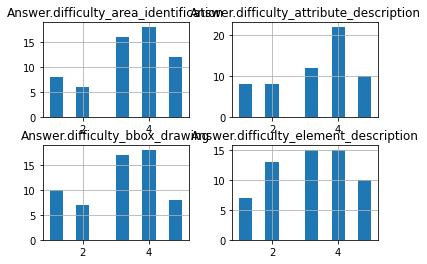

In [6]:
import sys
sys.path.append("..")
from utils import visualize_crowd_annotations, load_image
import pandas as pd
import os
import json
import matplotlib

pd.options.display.max_colwidth = None  # disable column truncation
output_dir = "." #".."
pilot_study = "Batch_4178149_batch_results.csv" #"Batch_4174329_batch_results.csv" #"pilot_study_results.csv"
#ground_truth = "pilot_study_ground_truth.csv"
output_df = pd.read_csv(os.path.join(output_dir, pilot_study), delimiter=",")
#ground_truth_df = pd.read_csv(os.path.join(output_dir, ground_truth), delimiter=",")
print("Overall avg. completion time: in seconds ", output_df["WorkTimeInSeconds"].mean(), \
     ", in minutes ", output_df["WorkTimeInSeconds"].mean() / 60)
print("Overall std dev. completion time: in seconds ", output_df["WorkTimeInSeconds"].std(), \
     ", in minutes ", output_df["WorkTimeInSeconds"].std() / 60)
print("Minimum time: in seconds ", output_df["WorkTimeInSeconds"].min(), ", in minutes ", output_df["WorkTimeInSeconds"].min() / 60)
print("Maximum time: in seconds ", output_df["WorkTimeInSeconds"].max(), ", in minutes ", output_df["WorkTimeInSeconds"].max() / 60)

print("Mean values per worker")
for index, annotation in enumerate(output_df["Answer.annotation_data0"]):
    output_df.loc[index, "Bounding_Box_Count"] = 0
for image_id in range(10):
    for index, annotation in enumerate(output_df["Answer.annotation_data" + str(image_id)]):
        output_df.loc[index, "Bounding_Box_Count"] += len(json.loads(annotation))
print("Minimum number of BB ", output_df["Bounding_Box_Count"].min())
print("Maximum number of BB ", output_df["Bounding_Box_Count"].max())
print("Average number of BB ", output_df[output_df.WorkTimeInSeconds >950]["Bounding_Box_Count"].mean(), output_df[output_df.WorkTimeInSeconds >950]["Bounding_Box_Count"].std())

for index, annotation in enumerate(output_df["Answer.annotation_data0"]):
    output_df.loc[index, "Bounding_Box_Count"] /= 10 
print("Average number of BB ", output_df["Bounding_Box_Count"].mean(), output_df["Bounding_Box_Count"].std())

print("Average number of BB ", output_df[output_df.WorkTimeInSeconds >950]["Bounding_Box_Count"].mean(), output_df[output_df.WorkTimeInSeconds >950]["Bounding_Box_Count"].std())


print(output_df[['Answer.difficulty_area_identification',
       'Answer.difficulty_attribute_description',
       'Answer.difficulty_bbox_drawing',
       'Answer.difficulty_element_description']].mean())
print(output_df[['Answer.difficulty_area_identification',
       'Answer.difficulty_attribute_description',
       'Answer.difficulty_bbox_drawing',
       'Answer.difficulty_element_description']].std())
mean_values_per_worker = output_df.groupby(["WorkerId"]).mean()
print(mean_values_per_worker[["WorkTimeInSeconds", "Bounding_Box_Count",'Answer.difficulty_area_identification',
       'Answer.difficulty_attribute_description',
       'Answer.difficulty_bbox_drawing',
       'Answer.difficulty_element_description']].sort_values(by="WorkTimeInSeconds"))

#print("Annotated images per worker")
#output_df["Input.image_name"] = output_df["Input.original_image_url0"].str[-10:] + " "
#images_per_worker = output_df.groupby(["WorkerId"])["Input.image_name"].sum()
#print(images_per_worker)

print("Mean values per image")
for image_id in range(10):
    for index, annotation in enumerate(output_df["Answer.annotation_data"+ str(image_id)]):
        output_df.loc[index, "Bounding_Box_Count"] = len(json.loads(annotation))

    mean_values_per_worker = output_df.groupby(["Input.heatmap_image_url" + str(image_id)]).mean()
    print(mean_values_per_worker[["WorkTimeInSeconds", "Bounding_Box_Count",'Answer.difficulty_area_identification',
       'Answer.difficulty_attribute_description',
       'Answer.difficulty_bbox_drawing',
       'Answer.difficulty_element_description']].sort_values(by="WorkTimeInSeconds"))

#sys.exit()

#sys.exit()
image = input("Type the image name you want to visualize or press ENTER to view all of them.")
if image:
    heatmap_urls = ["https://saliency-map-annotations.s3.amazonaws.com/pilot_study/" + image]  # input needs to be male|female/heamap_name
else:
    for image_id in range(10):

        heatmap_urls = output_df["Input.heatmap_image_url" + str(image_id)].unique()
        for heatmap in heatmap_urls:
            im = load_image(heatmap)
            heatmap_name = heatmap.rsplit('/', 1)[-1]  # throws away the directory information
            # Plot ground truth/pilot study annotations
            #ground_truth_annotation = ground_truth_df.loc[ground_truth_df['Input.heatmap_image_url'] == heatmap, ["Input.heatmap_image_url"+ str(image_id), "WorkerId", "Answer.annotation_data" + str(image_id)]]
            #ground_truth_annotation["WorkerId"] = "GROUND TRUTH"
            heatmap_annotations = output_df.loc[output_df['Input.heatmap_image_url'+ str(image_id)] == heatmap, ["Input.heatmap_image_url"+ str(image_id), "WorkerId", "Answer.annotation_data"+ str(image_id)]]
            # Merge ground truth and pilot study annotations
            #heatmap_annotations = pd.concat([ground_truth_annotation, heatmap_annotations], ignore_index=True)
            heatmap_annotations = pd.concat([heatmap_annotations], ignore_index=True)
            matplotlib.use("Qt5Agg")

            visualize_crowd_annotations(heatmap_annotations, heatmap_name, im, output_dir, image_id)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9A083ABE0>,
      dtype=object)

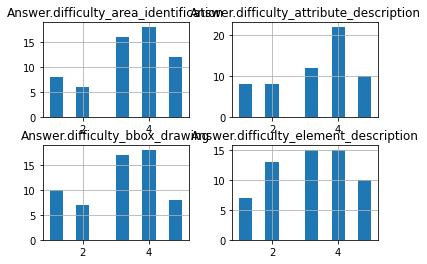

In [7]:
output_df[['Answer.difficulty_area_identification',
       'Answer.difficulty_attribute_description',
       'Answer.difficulty_bbox_drawing',
       'Answer.difficulty_element_description']].hist()

In [3]:
output_df[["WorkerId", "Answer.other_remark"]]

,WorkerId,Answer.other_remark
0,A3FQZ5B91QND53,Nothing
1,A23VWLX98JNB0Z,"A few of the fish I wasn't sure of the species so I just went with ""fish."" For the 5th image I didn't know what the underside of a shark is called so I went with shark belly."
2,A2PN1H89SQF28M,nothing
3,ALJXMXZYDT1UY,no
4,AKYV81FVBFEVS,good
5,AV79RIBEO6U0F,nothing
6,A117X97MGPDZQF,no
7,A73YY1K2QI8P4,good
8,A1PIO5E0JR9X6H,Nothing
9,A17MBHQ9NEK8EP,ITS INTERESTING


In [4]:
output_df.columns

Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate',
       'Input.original_image_url0', 'Input.original_image_url1',
       'Input.original_image_url2', 'Input.original_image_url3',
       'Input.original_image_url4', 'Input.original_image_url5',
       'Input.original_image_url6', 'Input.original_image_url7',
       'Input.original_image_url8', 'Input.original_image_url9',
       'Input.heatmap_image_url0', 'Input.heatmap_image_url1',
       'Input.heatmap_image_url2', 'Input.heatmap_image_url3',
   

In [7]:
# Analysis of precision / recall

In [9]:
#with open('../thesis_experiments/experiment_results/num_of_images/imagenet_fish_biased_extracted_features.json', 'r') as f:
#    imagenet_fish_biased_salient_features = json.load(f)

1 22 8.459425717852683


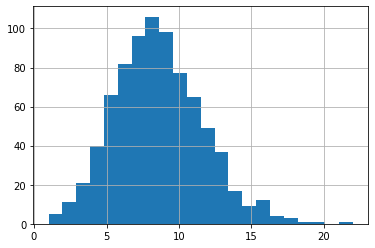

In [5]:
dataset = "imagenet_fish_biased"
annotations_df = pd.read_csv(os.path.join('../thesis_experiments/human_annotations', dataset + '.csv'), delimiter=',')  
nb_bb = annotations_df["Answer.annotation_data"].apply(lambda x: len(json.loads(x)))
print(nb_bb.min(), nb_bb.max(), nb_bb.mean())
nb_bb.hist(bins=22)

In [19]:

def disaggregate_term(term, all_representation_df, drop_term=True):
    def row_by_fish(row):
        #print(row[term])
        if row[term] == 1:
            if row["true_label"] == "American_lobster":
                return 0, 1, 0
            if row["true_label"] == "great_white_shark":
                return 1, 0, 0
            if row["true_label"] == "tench":
                return 0, 0, 1
        else:
            return 0, 0, 0
    all_representation_df["shark_" + term], all_representation_df["lobster_" + term], all_representation_df["trout_" + term] = zip(*all_representation_df.apply(lambda row: row_by_fish(row), axis=1))
    if (all_representation_df["shark_" + term] == 0).all():
        all_representation_df.drop(columns=["shark_" + term], inplace=True)
    if (all_representation_df["lobster_" + term] == 0).all():
        all_representation_df.drop(columns=["lobster_" + term], inplace=True)
    if (all_representation_df["trout_" + term] == 0).all():
        all_representation_df.drop(columns=["trout_" + term], inplace=True)
    if drop_term:
        all_representation_df.drop(columns=[term], inplace=True)
    return all_representation_df

In [20]:
import sys
import os
import json
sys.path.append("..")

# 1) Prepare ground truth.
from crowd_computing.output_aggregation import get_aggregated_annotations, compute_feature_pairs
from semantic_feature_representation.semantic_feature_representation import get_structured_representation

dataset = "imagenet_fish_biased"
annotations_df = pd.read_csv(os.path.join('../thesis_experiments/human_annotations', dataset + '.csv'), delimiter=',')  
    
with open(os.path.join('../thesis_experiments/word_mapping_functions', dataset + '.json'), 'r') as f:
    word_mapping_function = json.load(f)
# Step 1: extract 'all' semantic representation
# Extract elements, attributes and pairs
elements_aggregated_annotations = get_aggregated_annotations(annotations_df, word_mapping_function, 'elements', 'binary')
attributes_aggregated_annotations = get_aggregated_annotations(annotations_df, word_mapping_function, 'attributes', 'binary')
pairs_aggregated_annotations = get_aggregated_annotations(annotations_df, word_mapping_function, 'element_attribute_pairs', 'binary')
# Compute their combinations
elements_combinations = compute_feature_pairs(elements_aggregated_annotations)
attributes_combinations = compute_feature_pairs(attributes_aggregated_annotations)
pairs_combinations = compute_feature_pairs(pairs_aggregated_annotations)
# Merge all aggregated dictionaries according to image name(key)
#all_aggregated_annotations = dict([(k, {**elements_aggregated_annotations[k], **attributes_aggregated_annotations[k], **pairs_aggregated_annotations[k],
#                                            **elements_combinations[k], **attributes_combinations[k], **pairs_combinations[k]}) for k in elements_aggregated_annotations])
all_aggregated_annotations = dict([(k, {**elements_aggregated_annotations[k]}) for k in elements_aggregated_annotations])
 
    
#sys.exit()

# Extract 'all' semantic representation
image_labels_predictions = pd.read_csv(os.path.join('../thesis_experiments/model_predictions', dataset + '.csv'), delimiter=',')

all_representation_df_GT = get_structured_representation(image_labels_predictions, all_aggregated_annotations, 'binary')
# print_features_counts_per_prediction(all_representation_df, count_filter=2, bar_chart=False)


"""
# Step 2: use statistical tests to obtain semantic features with Cramer V values
    if ground_truth == 'single':
        ground_truth_sample_df = all_representation_df.sample(n=400)
        ground_truth_features, ground_truth_cramers_values = compute_statistical_tests(ground_truth_sample_df, print_test_values=False, representation_values='binary')
        ground_truth_features_cramers_values = [item for item in sorted(zip(ground_truth_features, ground_truth_cramers_values), key=lambda pair: pair[1], reverse=True)]
    # Step 3: obtain semantic features for different annotation sizes
    num_images_lists = {'iterations': []}
    for i in tqdm(range(repetitions)):
        if ground_truth == 'multiple':
            ground_truth_sample_df = all_representation_df.sample(n=400)
            ground_truth_features, ground_truth_cramers_values = compute_statistical_tests(ground_truth_sample_df, print_test_values=False, representation_values='binary')
            ground_truth_features_cramers_values = {item[0]: item[1] for item in sorted(zip(ground_truth_features, ground_truth_cramers_values), key=lambda pair: pair[1], reverse=True)}
        iteration_info = {'iteration_num': i + 1, 'ground_truth': ground_truth_features_cramers_values, 'extracted_lists': {}}
        num_images_lists['iterations'].append(iteration_info)
        for j, annotation_size in enumerate(annotation_sizes):
            annotation_sample = all_representation_df.sample(n=annotation_size)
            sample_features, sample_cramers_values = compute_statistical_tests(annotation_sample, representation_values='binary')
            features_cramers_values = {item[0]: item[1] for item in sorted(zip(sample_features, sample_cramers_values), key=lambda pair: pair[1], reverse=True)}
            num_images_lists['iterations'][i]['extracted_lists'][annotation_size] = features_cramers_values
        
"""

"\n# Step 2: use statistical tests to obtain semantic features with Cramer V values\n    if ground_truth == 'single':\n        ground_truth_sample_df = all_representation_df.sample(n=400)\n        ground_truth_features, ground_truth_cramers_values = compute_statistical_tests(ground_truth_sample_df, print_test_values=False, representation_values='binary')\n        ground_truth_features_cramers_values = [item for item in sorted(zip(ground_truth_features, ground_truth_cramers_values), key=lambda pair: pair[1], reverse=True)]\n    # Step 3: obtain semantic features for different annotation sizes\n    num_images_lists = {'iterations': []}\n    for i in tqdm(range(repetitions)):\n        if ground_truth == 'multiple':\n            ground_truth_sample_df = all_representation_df.sample(n=400)\n            ground_truth_features, ground_truth_cramers_values = compute_statistical_tests(ground_truth_sample_df, print_test_values=False, representation_values='binary')\n            ground_truth_featu

In [21]:
to_rename_wing = {}
for col in list(all_representation_df_GT.columns):
    if "wing" in col:
        to_rename_wing[col] = col.replace("wing", "fin")
all_representation_df_GT.rename(columns=to_rename_wing, inplace=True)

to_rename_fingers = {}
for col in list(all_representation_df_GT.columns):
    if "fingers" in col:
        to_rename_fingers[col] = col.replace("fingers", "hand")
    elif "finger" in col:
        to_rename_fingers[col] = col.replace("finger", "hand")
all_representation_df_GT.rename(columns=to_rename_fingers, inplace=True)

if "face" in list(all_representation_df_GT.columns):
    all_representation_df_GT.rename(columns={"face":"human_face"}, inplace=True)

all_representation_df_GT = disaggregate_term("eye", all_representation_df_GT, False)

if len(list(all_representation_df_GT.columns)) != len(set(list(all_representation_df_GT.columns))):
        columns_to_handle = (set([x for x in list(all_representation_df_GT.columns) if list(all_representation_df_GT.columns).count(x) > 1]))
        other_columns = (set(list(all_representation_df_GT.columns)))
        other_columns = [x for x in other_columns if x not in columns_to_handle]
        df = all_representation_df_GT[columns_to_handle].groupby(level=0, axis=1).sum()
        
        df = df[columns_to_handle].applymap(lambda x: 1 if x> 0 else 0)
        all_representation_df_GT = pd.concat([all_representation_df_GT[other_columns], df], axis=1, sort=False)
    

In [22]:
list(all_representation_df_GT.columns)

['image_name',
 'true_label',
 'predicted_label',
 'wall',
 'background',
 'lobster',
 'flower',
 'eye',
 'coin',
 'table',
 'thing',
 'wood',
 'teeth',
 'shark',
 'boat',
 'shark_lung',
 'cage',
 'fish',
 'shark_nostril',
 'sky',
 'trout',
 'fish_head',
 'trunk',
 'rope',
 'ball',
 'diver',
 'stomach',
 'trash',
 'stone',
 'box',
 'tent',
 'basket',
 'asparagus',
 'sand',
 'chair',
 'sink',
 'classification_check',
 'shark_eye',
 'lobster_eye',
 'trout_eye']

In [23]:
# Get list images at hand

output_dir = "."
pilot_study = "Batch_4178149_batch_results.csv" #"Batch_4174329_batch_results.csv" 
output_df = pd.read_csv(os.path.join(output_dir, pilot_study), delimiter=",")

list_images = []
for index, row in output_df.iterrows():
    for i in range(10):
        list_images.append(row["Input.original_image_url" + str(i)])

In [24]:
list_images = [l.split('/')[-1] for l in list_images]
list_images = list(set(list_images))
all_images = all_representation_df_GT[all_representation_df_GT['image_name'].isin(list_images)]


In [25]:
#len(list_images)
#all_images.columns

In [26]:
#len(all_images)
#len(all_representation_df['image_name'].unique())
len(list(set(all_representation_df_GT['image_name'].unique()) & set(list_images)) )

200

In [27]:
from semantic_feature_representation.representation_analysis import compute_statistical_tests, print_features_counts_per_prediction

ground_truth_features, ground_truth_cramers_values = compute_statistical_tests(all_images, print_test_values=False, representation_values='binary')
ground_truth_features_cramers_values = [item for item in sorted(zip(ground_truth_features, ground_truth_cramers_values), key=lambda pair: pair[1], reverse=True)]
    

In [28]:
ground_truth_features_cramers_values

[('trout', 0.94),
 ('lobster', 0.92),
 ('shark', 0.88),
 ('shark_eye', 0.25),
 ('eye', 0.22)]

In [29]:
# Prepare predictions

dataset = "imagenet_fish_biased"

output_dir = "."
pilot_study = "Batch_4178149_batch_results.csv" #"Batch_4174329_batch_results.csv" 
annotations_df = pd.read_csv(os.path.join(output_dir, pilot_study), delimiter=",")


###### Process to the same shape as the ground truth.
### Separate the 10 images per task.

list_image_url = []
list_heatmap_url = []
list_annotation_data = []
for idx, row in annotations_df.iterrows():
    for i in range(10):
        list_image_url.append(row["Input.original_image_url" + str(i)])
        list_heatmap_url.append(row["Input.heatmap_image_url" + str(i)])
        list_annotation_data.append(row["Answer.annotation_data" + str(i)])
list_image_url = [im.split('/')[-1] for im in list_image_url]
list_heatmap_url = [im.split('/')[-1] for im in list_heatmap_url]

new_annotation_df = pd.DataFrame({"Input.original_image_url": list_image_url,\
                                  "Input.heatmap_image_url": list_heatmap_url,\
                                  "Answer.annotation_data": list_annotation_data})

### Aggregate the annotations from different annotators.

# For now, we just keep everything.
image_urls = new_annotation_df['Input.original_image_url'].unique()
new_aggregated_annotation_df = pd.DataFrame({"Input.original_image_url":[],\
                                            "Input.heatmap_image_url":[],\
                                             "Answer.annotation_data":[],\
                                             "WorkerId":[]})
for image in image_urls:
    heatmap_annotations = new_annotation_df.loc[new_annotation_df['Input.original_image_url'] == image, ['Input.original_image_url', 'Input.heatmap_image_url', 'Answer.annotation_data']]
    annotations_image = []
    for annotation in heatmap_annotations['Answer.annotation_data']:  # For each annotation/worker
        json_annotation = json.loads(annotation)
        annotations_image += (json_annotation)
            
    new_aggregated_annotation_df.loc[len(new_aggregated_annotation_df)] = ([image, heatmap_annotations['Input.heatmap_image_url'].iloc[0],\
                                        json.dumps(annotations_image), 0])


# Take only images that are in common with the ground truth.

#all_images = all_representation_df[all_representation_df['image_name'].isin(list_images)]
image_list_relevant = all_images['image_name']

annotations_df = new_aggregated_annotation_df[new_aggregated_annotation_df['Input.original_image_url'].isin(image_list_relevant)]

with open(os.path.join('../thesis_experiments/word_mapping_functions', dataset + "_predictions"+ '.json'), 'r') as f:
    word_mapping_function = json.load(f)
# Step 1: extract 'all' semantic representation
# Extract elements, attributes and pairs
elements_aggregated_annotations = get_aggregated_annotations(annotations_df, word_mapping_function, 'elements', 'binary')
attributes_aggregated_annotations = get_aggregated_annotations(annotations_df, word_mapping_function, 'attributes', 'binary')
pairs_aggregated_annotations = get_aggregated_annotations(annotations_df, word_mapping_function, 'element_attribute_pairs', 'binary')
# Compute their combinations
elements_combinations = compute_feature_pairs(elements_aggregated_annotations)
attributes_combinations = compute_feature_pairs(attributes_aggregated_annotations)
pairs_combinations = compute_feature_pairs(pairs_aggregated_annotations)
# Merge all aggregated dictionaries according to image name(key)
#all_aggregated_annotations = dict([(k, {**elements_aggregated_annotations[k], **attributes_aggregated_annotations[k], **pairs_aggregated_annotations[k],
                                           # **elements_combinations[k], **attributes_combinations[k], **pairs_combinations[k]}) for k in elements_aggregated_annotations])
#all_aggregated_annotations = dict([(k, {**elements_aggregated_annotations[k]}) for k in elements_aggregated_annotations])
all_aggregated_annotations = dict([(k, {**elements_aggregated_annotations[k], **pairs_aggregated_annotations[k]}) for k in elements_aggregated_annotations])
     
#sys.exit()

# Extract 'all' semantic representation
image_labels_predictions = pd.read_csv(os.path.join('../thesis_experiments/model_predictions', dataset + '.csv'), delimiter=',')

all_representation_df = get_structured_representation(image_labels_predictions, all_aggregated_annotations, 'binary')
# print_features_counts_per_prediction(all_representation_df, count_filter=2, bar_chart=False)
if "none" in all_representation_df.columns:
    all_representation_df = all_representation_df.drop(["none"], axis=1)
    
to_rename_wing = {}
for col in list(all_representation_df.columns):
    if "wing" in col:
        to_rename_wing[col] = col.replace("wing", "fin")
all_representation_df.rename(columns=to_rename_wing, inplace=True)

for x in list(all_representation_df.columns):
    if "face" in x:
        all_representation_df.rename(columns={x:x.replace("face","human_face")}, inplace=True)

In [31]:
# Post process columns that do not fit here.

# Here the reasoning is that we remove colors as we just want elements.
list_terms_to_remove = ["yes", "no", "none", \
                        "pink", "yellow", "grey", "orange", "white", "dark", "light",\
                        "rose", "gray", "white", "brown", "blue", "green", "red",\
                        "black", "yellowgreen", "scales",
                        "long", "small", "good", "bad", "nice","very", "old", "sad", "cute",\
                       "-hand"]
for term_to_remove in list_terms_to_remove:
    current_columns = list(all_representation_df.columns)
    for x in current_columns:
        if term_to_remove in x and x != "predicted_label":
            all_representation_df = all_representation_df.drop([x], axis=1)

            
import re
# Certain elements should be renamed when they are a combination of relevant terms.
print(list(all_representation_df.columns))

def rename_columns_based_on_term_combination(term1, term2, all_representation_df):
    for possible_column in list(all_representation_df.columns):
        if "-" in possible_column:
            splitted_col = re.split('-', possible_column)
            term1_not_in1 = True
            term_1 = ""
            for term in term1:
                if term in splitted_col[0]:
                    term1_not_in1 = False
                    term_1 = term
            if not term1_not_in1:
                term2_not_in2 = True
                term_2 = ""
                for term in term2:
                    if term in splitted_col[1]:
                        term2_not_in2 = False
                        term_2 = term
                if not term2_not_in2:
                    all_representation_df = all_representation_df.rename(columns={possible_column: term_1 + "_" + term_2 })
            else:
                term2_not_in2 = True
                term_2 = ""
                for term in term2:
                    if term in splitted_col[0]:
                        term2_not_in2 = False
                        term_2 = term
                if not term2_not_in2:
                    term1_not_in1 = True
                    term_1 = ""
                    for term in term1:
                        if term in splitted_col[1]:
                            term1_not_in1 = False
                            term_1 = term
                    if not term1_not_in1:
                        all_representation_df = all_representation_df.rename(columns={possible_column: term_1 + "_" + term_2 })
    # Aggregate duplicate columns.
    if len(list(all_representation_df.columns)) != len(set(list(all_representation_df.columns))):
        columns_to_handle = (set([x for x in list(all_representation_df.columns) if list(all_representation_df.columns).count(x) > 1]))
        other_columns = (set(list(all_representation_df.columns)))
        other_columns = [x for x in other_columns if x not in columns_to_handle]
        df = all_representation_df[columns_to_handle].groupby(level=0, axis=1).sum()
        
        df = df[columns_to_handle].applymap(lambda x: 1 if x> 0 else 0)
        all_representation_df = pd.concat([all_representation_df[other_columns], df], axis=1, sort=False)
    
    return all_representation_df
term1 = ["trout", "shark", "fish", "lobster", "dolphin"]
term2 = ["body", "lung", "stomach", "wing", "head", "teeth", "gill", "gills", "jaw", "fin"]
all_representation_df = rename_columns_based_on_term_combination(term1, term2, all_representation_df)

if "stomach" in list(all_representation_df.columns):
    all_representation_df.drop(columns=['stomach'], inplace=True)

# Certain columns should be aggregated into one.
def aggregate_terms(term, all_representation_df):
    to_aggregate = []
    for x in list(all_representation_df.columns):
        for term_to_search in term:
            if term_to_search in x:
                to_aggregate.append(x)
    all_representation_df[term[0]] = all_representation_df[to_aggregate].sum(axis=1)
    all_representation_df[term[0]] = all_representation_df[term[0]].apply(lambda x: 1 if x> 0 else 0)
    
    if term[0] in to_aggregate:
        to_aggregate.remove(term[0])
    all_representation_df = all_representation_df.drop(to_aggregate, axis=1)
    return all_representation_df

term = ["eye"]
to_aggregate = []
for x in list(all_representation_df.columns):
    for term_to_search in term:
        if term_to_search in x:
            to_aggregate.append(x)
all_representation_df[term[0]] = all_representation_df[to_aggregate].sum(axis=1)
all_representation_df[term[0]] = all_representation_df[term[0]].apply(lambda x: 1 if x> 0 else 0)
    


term = ["fin"]
for x in list(all_representation_df.columns):
    for term_to_search in term:
        if term_to_search in x:    
            all_representation_df = disaggregate_term(x, all_representation_df)
            
all_representation_df.rename(columns={"fisheye": "fish_eye"}, inplace=True)
print(len(list(all_representation_df.columns)))



#sys.exit()
"""
all_representation_df = aggregate_terms(["eye"], all_representation_df)
all_representation_df = aggregate_terms(["wood"], all_representation_df)
all_representation_df = aggregate_terms(["crab"], all_representation_df)
all_representation_df = aggregate_terms(["boat"], all_representation_df)
all_representation_df = aggregate_terms(["hook"], all_representation_df)

all_representation_df = aggregate_terms(["plate"], all_representation_df)
all_representation_df = aggregate_terms(["fingers", "finger"], all_representation_df)

all_representation_df = aggregate_terms(["lobster_claw", "claw"], all_representation_df)

all_representation_df = aggregate_terms(["hand"], all_representation_df)

all_representation_df = aggregate_terms(["shark_teeth"], all_representation_df)

all_representation_df = aggregate_terms(["cap", "hat"], all_representation_df)
all_representation_df = aggregate_terms(["human", "man", "woman", "men", "boy", "girl"], all_representation_df)

all_representation_df = aggregate_terms(["lobster_leg", "leg"], all_representation_df)

all_representation_df = aggregate_terms(["trout_body"], all_representation_df)
all_representation_df = aggregate_terms(["shark_stomach"], all_representation_df)
"""



['back-shark', 'with-fist', 'sharp-hook', 'tail', 'towel', 'tail-lobster', 'fry-trout_body', 'caudal', 'human-cheek', 'dorsal-trout_body', 'bonefish-low', 'grill-trout_body', 'block', 'shark_back body', 'been-trout_body', 'bruise', 'shark_left', 'length', 'lobster_claw', 'oil-body', 'wooden_log', 'fast', 'tail-shark', 'fry-cramp', 'man', 'head-boy', 'for-block', 'bream', 'ambulate', 'pipe', 'ocean_water', 'human_face-boy', 'mouth-trout_body', 'eating-mouth', 'steel-boat', 'shark-water', 'tasty', 'hard-pole', 'grace', 'a', 'ant', 'oyster', 'eye', 'lake', 'fishers-weight', 'background', 'air-pectoralis', 'huge-trout_body', 'mouth-shark', 'billfish-sierra', 'food-mouth', 'spine', 'fish_head', 'drink-soup', 'holes-gills', 'gills-pectoralis', 'head-crab', 'human_shirt', 'lobsters_leg', 'fish catch-two', 'fry-shrimp', 'rough-skin', 'gripe-lobster_claw', 'fish_spine', 'human', 'animal-water', 'fish catching-man', 'trout_body-eye', 'crap fry-crab', 'hat', 'stomach-crab', 'fist-man', 'big-size'

'\nall_representation_df = aggregate_terms(["eye"], all_representation_df)\nall_representation_df = aggregate_terms(["wood"], all_representation_df)\nall_representation_df = aggregate_terms(["crab"], all_representation_df)\nall_representation_df = aggregate_terms(["boat"], all_representation_df)\nall_representation_df = aggregate_terms(["hook"], all_representation_df)\n\nall_representation_df = aggregate_terms(["plate"], all_representation_df)\nall_representation_df = aggregate_terms(["fingers", "finger"], all_representation_df)\n\nall_representation_df = aggregate_terms(["lobster_claw", "claw"], all_representation_df)\n\nall_representation_df = aggregate_terms(["hand"], all_representation_df)\n\nall_representation_df = aggregate_terms(["shark_teeth"], all_representation_df)\n\nall_representation_df = aggregate_terms(["cap", "hat"], all_representation_df)\nall_representation_df = aggregate_terms(["human", "man", "woman", "men", "boy", "girl"], all_representation_df)\n\nall_representati

In [32]:
print((list(all_representation_df.columns)))


['back-shark', 'with-fist', 'sharp-hook', 'tail', 'towel', 'tail-lobster', 'fry-trout_body', 'caudal', 'human-cheek', 'dorsal-trout_body', 'bonefish-low', 'grill-trout_body', 'block', 'shark_back body', 'bruise', 'been-trout_body', 'shark_left', 'length', 'lobster_claw', 'wooden_log', 'oil-body', 'fast', 'tail-shark', 'fry-cramp', 'man', 'head-boy', 'for-block', 'bream', 'ambulate', 'pipe', 'ocean_water', 'human_face-boy', 'mouth-trout_body', 'eating-mouth', 'steel-boat', 'shark-water', 'tasty', 'hard-pole', 'grace', 'a', 'ant', 'oyster', 'eye', 'lake', 'fishers-weight', 'background', 'air-pectoralis', 'huge-trout_body', 'mouth-shark', 'billfish-sierra', 'food-mouth', 'spine', 'fish_head', 'drink-soup', 'holes-gills', 'gills-pectoralis', 'head-crab', 'human_shirt', 'lobsters_leg', 'fish catch-two', 'fry-shrimp', 'rough-skin', 'gripe-lobster_claw', 'fish_spine', 'human', 'animal-water', 'fish catching-man', 'trout_body-eye', 'crap fry-crab', 'hat', 'stomach-crab', 'fist-man', 'big-size'

In [33]:
# Cluster features (elements, element, attributes)
import gensim
import tqdm
import numpy as np
from gensim.models import FastText

def load_fasttext():
        print('loading word embeddings...')
        embeddings_index = {}
        f = open('../../crawl-300d-2M.vec/crawl-300d-2M.vec',encoding='utf-8')
        for line in tqdm.tqdm(f):
            values = line.strip().rsplit(' ')
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        f.close()
        print('found %s word vectors' % len(embeddings_index))
    
        return embeddings_index

embeddings_index=load_fasttext()

embeddings_index['london'].shape


556it [00:00, 5517.97it/s]

loading word embeddings...


1999996it [06:35, 5058.15it/s]


found 1999996 word vectors


(300,)

In [34]:
import re
x = []
y_label = []
list_features = list(all_representation_df.columns)
list_features.remove("true_label")
list_features.remove("predicted_label")
list_features.remove("image_name")
list_features.remove("classification_check")
#print(list_features)
for feature in list_features:
    """
    if "shark" in feature and len(feature) != len("shark"):
        feature = feature.replace("shark", "")
    if "trout" in feature and len(feature) != len("trout"):
        feature = feature.replace("trout", "")
    if "lobster" in feature and len(feature) != len("lobster"):
        feature = feature.replace("lobster", "")
    """
    
    process_feature = re.split('[_-]|\s+', feature)
    if "" in process_feature:
        process_feature.remove("")
    if "" in process_feature:
        process_feature.remove("")
    print(process_feature)
    if "lowerstomach" in process_feature:
        process_feature.remove("lowerstomach")
        process_feature.append("lower")
        process_feature.append("stomach")
    if "cordialfin" in process_feature:
        process_feature.remove("cordialfin")
        process_feature.append("codal")
        process_feature.append("fin")
    if "pactoralfin" in process_feature:
        process_feature.remove("pactoralfin")
        process_feature.append("pectoral")
        process_feature.append("fin")
    if "pectrol" in process_feature:
        process_feature.remove("pectrol")
        process_feature.append("pectoral")
    if "middlestomach" in process_feature:
        process_feature.remove("middlestomach")
        process_feature.append("middle")
        process_feature.append("stomach")
    if "adbomen" in process_feature:
        process_feature.remove("adbomen")
        process_feature.append("abdomen")

    #temp_embedd = [embeddings_index[feat] for feat in process_feature]
    #print(process_feature)
    #x.append(np.mean(temp_embedd, axis=0))
    #print(feature)
    #y_label.append(feature)
    
    y_label += process_feature
    x += [embeddings_index[feat] for feat in process_feature]
    
#X = np.array(x)


print(len(x))
print(len(y_label))
print(len(list(set(y_label))))
#print(len(list(set(x))))
y_label_crop= list(set(y_label))
x_crop = [embeddings_index[feat] for feat in y_label_crop]
    
X = np.array(x_crop)

['back', 'shark']
['with', 'fist']
['sharp', 'hook']
['tail']
['towel']
['tail', 'lobster']
['fry', 'trout', 'body']
['caudal']
['human', 'cheek']
['dorsal', 'trout', 'body']
['bonefish', 'low']
['grill', 'trout', 'body']
['block']
['shark', 'back', 'body']
['bruise']
['been', 'trout', 'body']
['shark', 'left']
['length']
['lobster', 'claw']
['wooden', 'log']
['oil', 'body']
['fast']
['tail', 'shark']
['fry', 'cramp']
['man']
['head', 'boy']
['for', 'block']
['bream']
['ambulate']
['pipe']
['ocean', 'water']
['human', 'face', 'boy']
['mouth', 'trout', 'body']
['eating', 'mouth']
['steel', 'boat']
['shark', 'water']
['tasty']
['hard', 'pole']
['grace']
['a']
['ant']
['oyster']
['eye']
['lake']
['fishers', 'weight']
['background']
['air', 'pectoralis']
['huge', 'trout', 'body']
['mouth', 'shark']
['billfish', 'sierra']
['food', 'mouth']
['spine']
['fish', 'head']
['drink', 'soup']
['holes', 'gills']
['gills', 'pectoralis']
['head', 'crab']
['human', 'shirt']
['lobsters', 'leg']
['fish', 

In [35]:

#print(get_cosine_similarity(embeddings_index["tail"], embeddings_index["shark"]))
#print(get_cosine_similarity(embeddings_index["tail"], embeddings_index["wing"]))
print(get_cosine_similarity(embeddings_index["fin"], embeddings_index["antennae"]))
print(get_cosine_similarity(embeddings_index["fin"], embeddings_index["antenna"]))

NameError: name 'get_cosine_similarity' is not defined

In [ ]:
"""
from sklearn import cluster
from sklearn import metrics

silhouette_ = []
for NUM_CLUSTERS in range(2,140):

    kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
    kmeans.fit(X)

    labels = kmeans.labels_
    #centroids = kmeans.cluster_centers_

    #print ("Cluster id labels for inputted data")
    #print (labels)
    #print ("Centroids data")
    #print (centroids)

    print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
    print (kmeans.score(X))

    silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
    silhouette_.append(silhouette_score)

    print ("Silhouette_score: ")
    print (silhouette_score)

import matplotlib.pyplot as plt

plt.plot(range(2,140), silhouette_)


import matplotlib.cm as cm


for n_clusters in range(2, 30):
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the " + str(n_clusters) + " clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
"""

In [36]:
from utils import precision, recall,  compute_MAE

def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

In [37]:
def get_list_concepts_from_outputs(output_concept_cramer, filter_cramer_value):
    prediction_features = []
    prediction_features_dict = {}
    for feat_tuple in output_concept_cramer:
        if feat_tuple[1] > filter_cramer_value:
            prediction_features.append(feat_tuple[0])
            prediction_features_dict[frozenset(feat_tuple[0])] = feat_tuple[1]
    return prediction_features, prediction_features_dict

In [ ]:
#for i in range(5, 160, 15):
#    print(i)

In [38]:
#nb_clus = 110
#threshold_acceptance = 0.4
from sklearn import cluster
from sklearn import metrics

get_info = False
if get_info:
    dict_results = {}
    dict_results["precision"] = []
    dict_results["recall"] = []
    dict_results["MAE"] = []
    dict_results["nb cluster"] =[]
    dict_results["threshold_acceptance"] = []

for nb_clus in [125]:#range(5, 180, 15):
    for threshold_acceptance in [0.3]:#[0.1, 0.3, 0.5, 0.7, 0.9]:

        clusterer = cluster.KMeans(n_clusters=nb_clus, random_state=10)
        cluster_labels = clusterer.fit_predict(X)


        list_concept_cluster=[]

        for i in range(nb_clus):
            cluster_id = i
            print("Cluster ", str(i))
            print(set([y_label_crop[j] for j in np.flatnonzero((cluster_labels == cluster_id))]))
            list_concept_cluster.append(set([y_label_crop[j] for j in np.flatnonzero((cluster_labels == cluster_id))]))

        cluster_result = {"centroid": clusterer.cluster_centers_,\
                          "label_concepts":list_concept_cluster}

        # Now map features to clusters.
        # now we create the new representation.
        list_mappings = dict()


        list_features = list(all_representation_df.columns)
        list_features.remove("true_label")
        list_features.remove("predicted_label")
        list_features.remove("image_name")
        list_features.remove("classification_check")
        #print(list_features)

        list_possible_tuples = []

        for feature in list_features:
            """
            if "shark" in feature and len(feature) != len("shark"):
                feature = feature.replace("shark", "")
            if "trout" in feature and len(feature) != len("trout"):
                feature = feature.replace("trout", "")
            if "lobster" in feature and len(feature) != len("lobster"):
                feature = feature.replace("lobster", "")
            """

            process_feature = re.split('[_-]|\s+', feature)
            if "" in process_feature:
                process_feature.remove("")
            if "" in process_feature:
                process_feature.remove("")
            if "lowerstomach" in process_feature:
                process_feature.remove("lowerstomach")
                process_feature.append("lower")
                process_feature.append("stomach")
            if "cordialfin" in process_feature:
                process_feature.remove("cordialfin")
                process_feature.append("codal")
                process_feature.append("fin")
            if "pactoralfin" in process_feature:
                process_feature.remove("pactoralfin")
                process_feature.append("pectoral")
                process_feature.append("fin")
            if "pectrol" in process_feature:
                process_feature.remove("pectrol")
                process_feature.append("pectoral")
            if "middlestomach" in process_feature:
                process_feature.remove("middlestomach")
                process_feature.append("middle")
                process_feature.append("stomach")
            if "adbomen" in process_feature:
                process_feature.remove("adbomen")
                process_feature.append("abdomen")

            #temp_embedd = [embeddings_index[feat] for feat in process_feature]
            #print(process_feature)
            #print(sorted(set([clusterer.predict((embeddings_index[feat]).reshape(1,-1)).tolist()[0] for feat in process_feature])))

            list_possible_tuples.append(set([clusterer.predict((embeddings_index[feat]).reshape(1,-1)).tolist()[0] for feat in process_feature]))

            list_mappings[feature] = str(sorted(set([clusterer.predict((embeddings_index[feat]).reshape(1,-1)).tolist()[0] for feat in process_feature])))
            #x.append(np.mean(temp_embedd, axis=0))

            # Number of features:
        print("number of features: ", len(set(frozenset(s) for s in list_possible_tuples)))


        all_representation_df_new = all_representation_df[:]
        print(list(all_representation_df_new.columns))
        #print(all_representation_df_new.shape)
        all_representation_df_new.rename(columns=list_mappings, inplace=True)
        import numbers
        all_representation_df_new = all_representation_df_new.groupby(by=all_representation_df_new.columns, axis=1).apply(lambda g: g.mean(axis=1) if isinstance(g.iloc[0,0], numbers.Number) else g.iloc[:,0])
        #print(all_representation_df_new.shape)
        all_representation_df_new = pd.concat([all_representation_df_new[set(list(list_mappings.values()))].applymap(lambda x: 1 if x> 0 else 0), all_representation_df_new[["predicted_label", "true_label", "image_name", "classification_check"]]], axis=1, sort=False)
        #print(list(all_representation_df_new.columns))
        print(list(all_representation_df_new.columns))

        import ast

        prediction_features, prediction_cramers_values = compute_statistical_tests(all_representation_df_new, print_test_values=False, representation_values='binary')
        prediction_features_cramers_values = [item for item in sorted(zip(prediction_features, prediction_cramers_values), key=lambda pair: pair[1], reverse=True)]
        #print(prediction_features_cramers_values)
        cramers_values_to_concepts = []
        for concept, cramers_value in prediction_features_cramers_values:
            if concept != "predicted_label" and concept != "true_label":
                concept_numbers = ast.literal_eval(concept)
                concept_name = [list_concept_cluster[k] for k in concept_numbers]
                cramers_values_to_concepts.append((concept_numbers, concept_name, cramers_value))


        # Now, we need to reconcile the ground truth and these outputs to make the evaluation of the precision and recall and MAE.

        from sklearn.metrics.pairwise import cosine_similarity
        def get_cosine_similarity(feature_vec_1, feature_vec_2):    
            return cosine_similarity(feature_vec_1.reshape(1, -1), feature_vec_2.reshape(1, -1))[0][0]

        # First, we obtain the list of ground truth centroids.
        list_GT_centroids = []
        list_GT_features = []
        for concept, _ in ground_truth_features_cramers_values:
            process_feature = re.split('[_-]|\s+', concept)
            list_GT_features += process_feature
        for feat in list_GT_features:
            list_GT_centroids += [(feat, embeddings_index[feat])]


        def find_GT_concepts(prediction_concept, threshold_acceptance, list_GT_centroids, transform=False, list_transform=[]):
            output_concept = []
            for individual_concept in prediction_concept:
                #print(individual_concept)
                # Compute similarity with GT concepts.
                concept_similarity = []
                for _, GT_concept in list_GT_centroids:
                    concept_similarity.append(get_cosine_similarity(cluster_result["centroid"][ individual_concept], GT_concept))
                if max(concept_similarity) > threshold_acceptance:
                    output_concept.append(list_GT_centroids[concept_similarity.index(max(concept_similarity))][0])
                else:
                    if transform:
                        output_concept.append(str(list_transform[individual_concept]))
                    else:
                        output_concept.append(individual_concept)
                #print(output_concept[-1])
            return output_concept

        prediction_output_processed = []
        prediction_output_processed_int = []

        for concept_list, _, cramersvalue in cramers_values_to_concepts:
            
            output_concept_int = find_GT_concepts(concept_list, threshold_acceptance, list_GT_centroids)
            output_concept = find_GT_concepts(concept_list, threshold_acceptance, list_GT_centroids, True,cluster_result["label_concepts"])
            prediction_output_processed_int.append(((set(output_concept_int)), cramersvalue))
            prediction_output_processed.append(((sorted(set(output_concept))), cramersvalue))
            print("Input concept: ", [cluster_result["label_concepts"][x] for x in concept_list], " ---> ", sorted(set(output_concept)))

        # We similarly transform the ground truth into sets for easiness to match.
        ground_truth_processed = []
        for concepts, cramers in ground_truth_features_cramers_values:
            concept_set = set(re.split('[_-]|\s+', concepts))
            ground_truth_processed.append((sorted(concept_set), cramers))

        cramer_value_filter = 0.2
        pred1, pred2 = get_list_concepts_from_outputs(prediction_output_processed, cramer_value_filter)
        GT1, GT2 = get_list_concepts_from_outputs(ground_truth_processed, cramer_value_filter)
        print(precision(pred1, GT1))
        print(recall(pred1, GT1))
        print(compute_MAE(pred2, GT2))

        pred1_str = [str(pre) for pre in pred1]
        GT1_str = [str(gt) for gt in GT1]


        print("Intersection")
        print(intersection(pred1_str, GT1_str))
        print(len(intersection(pred1_str, GT1_str)))
        print("Not intersection")
        #print(set(pred1_str) ^ set(GT1_str))
        print(len(set(pred1_str) ^ set(GT1_str)))
        print("Not in intersection and in GT")
        print((set(pred1_str) ^ set(GT1_str)) & set(GT1_str)) 
        print("Not in intersection and in pred")
        print((set(pred1_str) ^ set(GT1_str)) & set(pred1_str)) 
        if get_info:

            dict_results["precision"].append(precision(pred1, GT1))
            dict_results["recall"].append(recall(pred1, GT1))
            dict_results["MAE"].append(compute_MAE(pred2, GT2))
            dict_results["nb cluster"].append(nb_clus)
            dict_results["threshold_acceptance"].append(threshold_acceptance)

Cluster  0
{'feed'}
Cluster  1
{'lite'}
Cluster  2
{'ocean', 'sea', 'seawater'}
Cluster  3
{'dorsal', 'ventral', 'caudal'}
Cluster  4
{'legs', 'leg'}
Cluster  5
{'stop'}
Cluster  6
{'prawn', 'shrimp'}
Cluster  7
{'elbow', 'thumb', 'arm', 'hand', 'fingers', 'fist', 'finger'}
Cluster  8
{'chin', 'head', 'neck'}
Cluster  9
{'reflection', 'deep', 'narrow', 'big', 'huge', 'rough', 'been', 'a', 'special', 'senior'}
Cluster  10
{'jaw', 'jaws'}
Cluster  11
{'codal'}
Cluster  12
{'pintail'}
Cluster  13
{'rock', 'rocks'}
Cluster  14
{'pectoralis'}
Cluster  15
{'ambulate'}
Cluster  16
{'fishers'}
Cluster  17
{'clan', 'village', 'house'}
Cluster  18
{'muskellunge'}
Cluster  19
{'spiracles'}
Cluster  20
{'fins', 'fin', 'tail'}
Cluster  21
{'amman'}
Cluster  22
{'grebe'}
Cluster  23
{'belly', 'abdomen', 'stomach'}
Cluster  24
{'boun'}
Cluster  25
{'cheeks', 'cheek'}
Cluster  26
{'tree', 'trees'}
Cluster  27
{'billfish'}
Cluster  28
{'skirt', 'dress'}
Cluster  29
{'bonefish'}
Cluster  30
{'fishing'}


['[71, 108]', '[20, 23, 115]', '[3, 20, 42, 92]', '[9, 41, 115]', '[18]', '[8, 72]', '[39, 76]', '[9, 53]', '[80, 115, 119]', '[23, 42]', '[44]', '[30]', '[52, 94]', '[63]', '[31, 35, 90]', '[5, 32]', '[71]', '[31, 80]', '[19, 115]', '[31, 53]', '[31, 37]', '[28]', '[2, 32, 115]', '[42, 58]', '[20, 23, 42]', '[36, 42]', '[18, 53]', '[17, 101]', '[42, 48, 52]', '[78]', '[52, 82, 94]', '[52, 70, 81]', '[61, 119]', '[61]', '[86, 109]', '[31, 35, 42]', '[10, 115]', '[42, 88]', '[119]', '[83]', '[50, 72]', '[7, 42, 52]', '[12]', '[54]', '[41, 105]', '[36]', '[42]', '[81]', '[35, 53]', '[33, 41, 115]', '[31]', '[92]', '[43]', '[9, 48, 52, 97]', '[39, 42]', '[52, 103]', '[52, 112]', '[4]', '[26, 31]', '[89, 115]', '[7, 42]', '[31, 35, 59]', '[41, 115]', '[8, 32]', '[42, 52, 53]', '[33, 35]', '[74, 119]', '[49, 52]', '[23]', '[3, 42, 52]', '[29, 82]', '[9, 33]', '[7, 70, 72]', '[31, 42, 119]', '[7, 72]', '[42, 52, 114]', '[39, 121]', '[7, 119]', '[97]', '[23, 106]', '[3, 20, 42]', '[53, 115]',

Input concept:  [{'ocean', 'sea', 'seawater'}, {'and', 'attack', 'each', 'heart', 'table', 'night', 'planet', 'store', 'stay', 'arrived', 'paper', 'detail', 'block', 'nature', 'end', 'weight', 'of', 'bottom', 'two', 'size', 'net', 'inset', 'lays', 'point', 'death', 'search', 'length', 'back', 'run', 'space', 'middle', 'ant', 'cylinder', 'air', 'ice', 'left', 'body', 'function', 'water', 'plant', 'in', 'background', 'part', 'for', 'skin', 'file', 'the', 'bar'}]  --->  ['eye', 'shark']
Input concept:  [{'reflection', 'deep', 'narrow', 'big', 'huge', 'rough', 'been', 'a', 'special', 'senior'}, {'trout', 'carp', 'fish'}, {'and', 'attack', 'each', 'heart', 'table', 'night', 'planet', 'store', 'stay', 'arrived', 'paper', 'detail', 'block', 'nature', 'end', 'weight', 'of', 'bottom', 'two', 'size', 'net', 'inset', 'lays', 'point', 'death', 'search', 'length', 'back', 'run', 'space', 'middle', 'ant', 'cylinder', 'air', 'ice', 'left', 'body', 'function', 'water', 'plant', 'in', 'background', 'pa

In [175]:
# Results with no clustering of ground truth

0.475
0.6129032258064516
0.17888888888888893
Intersection
["['head', 'trout']", "['trees']", "['fin', 'shark']", "['shark', 'stomach']", "['leg', 'lobster']", "['body', 'shark']", "['head', 'shark']", "['water']", "['claw', 'lobster']", "['eye', 'shark']", "['plate']", "['body', 'lobster']", "['mouth', 'shark']", "['fin', 'trout']", "['grass']", "['face', 'human']", "['body', 'trout']", "['head', 'lobster']"]
18
Not intersection
31
Not in intersection and in GT
{"['neck']", "['background']", "['lemon']", "['sauce']", "['net']", "['eye']", "['hand']", "['shirt']", "['nose', 'shark']", "['oil']", "['elastic']", "['pot']", "['shellfish']"}
Not in intersection and in pred
{"['lobster']", "['body', 'inside', 'trout']", "['claw', 'shark']", "['shark', 'water']", "['eye', 'trout']", "['claw', 'inside', 'shark']", "['eye', 'lobster']", '["{\'proposes\'}"]', '["{\'woman\', \'men\', \'mans\', \'males\', \'man\'}"]', "['shark']", "['body', 'head', 'trout']", "['lobster', 'stomach']", "['head']", "['fish']", "['fin']", "['stomach', 'trout']", "['fin', 'lobster']", "['inside']"}

[('[104]', 0.74),
 ('[2]', 0.68),
 ('[17]', 0.65),
 ('[17, 69]', 0.59),
 ('[9, 28]', 0.52),
 ('[12, 17]', 0.49),
 ('[6, 9]', 0.47),
 ('[6, 104]', 0.46),
 ('[28, 104]', 0.45),
 ('[18, 104]', 0.44),
 ('[17, 31]', 0.43),
 ('[23, 104]', 0.43),
 ('[31, 104]', 0.41),
 ('[104, 109]', 0.39),
 ('[21]', 0.38),
 ('[113]', 0.37),
 ('[13, 68]', 0.37),
 ('[70]', 0.35),
 ('[9, 23]', 0.35),
 ('[40]', 0.34),
 ('[17, 23]', 0.33),
 ('[103, 104]', 0.33),
 ('[9, 31]', 0.31),
 ('[6, 17]', 0.3),
 ('[122]', 0.28),
 ('[6, 9, 11]', 0.24),
 ('[28]', 0.24),
 ('[31]', 0.23),
 ('[7]', 0.23),
 ('[6, 9, 31]', 0.22),
 ('[2, 104]', 0.22),
 ('[9, 103]', 0.22),
 ('[11]', 0.22),
 ('[2, 81]', 0.22),
 ('[88]', 0.21),
 ('[39]', 0.21),
 ('[17, 28]', 0.21),
 ('[17, 103]', 0.21),
 ('[11, 18, 104]', 0.21),
 ('[39, 122]', 0.21),
 ('[9]', 0.2),
 ('[6, 9, 70]', 0.2),
 ('[81]', 0.2),
 ('[85]', 0.2),
 ('[11, 85]', 0.2),
 ('[35]', 0.19),
 ('[2, 103]', 0.19),
 ('[13, 68, 104]', 0.19),
 ('[6, 9, 81]', 0.19),
 ('[56]', 0.18),
 ('[28, 35]

In [ ]:
Result with mediaum granualrity
0.5277777777777778
0.7037037037037037
0.18500000000000003
Intersection
["['trees']", "['fin', 'shark']", "['shark', 'stomach']", "['leg', 'lobster']", "['body', 'shark']", "['water']", "['claw', 'lobster']", "['eye', 'shark']", "['body', 'lobster']", "['mouth', 'shark']", "['fin', 'trout']", "['grass']", "['body', 'trout']", "['hand', 'human']"]
14
Not intersection
27
Not in intersection and in GT
{"['head', 'trout']", "['background']", "['body', 'human', 'part']", "['fishing', 'tool']", "['lemon']", "['food']", "['eye']", "['head', 'shark']", "['nose', 'shark']", "['elastic']", "['table', 'tool']", "['clothe']", "['head', 'lobster']"}
Not in intersection and in pred
{"['lobster']", "['body']", "['claw', 'shark']", "['hand']", "['table']", "['shark', 'water']", "['shark']", '["{\'proposes\'}"]', "['lobster', 'stomach']", "['fish']", "['fin']", "['stomach', 'trout']", "['human']", "['fin', 'lobster']"}

In [ ]:
Result lowest granularity
0.5555555555555556
1.0
0.404
Intersection
["['lobster']", "['eye']", "['trout']", "['eye', 'shark']", "['shark']"]
5
Not intersection
9
Not in intersection and in GT
set()
Not in intersection and in pred
{'["{\'grass\', \'weeds\'}"]', "['eye', 'trout']", "['eye', 'lobster']", '["{\'proposes\'}"]', "['shark', 'trout']", "['lobster', 'shark']", '["{\'tree\', \'trees\'}"]', '["{\'woman\', \'men\', \'boy\', \'mans\', \'males\', \'child\', \'man\'}"]', '[\'lobster\', "{\'legs\', \'leg\'}"]'}

In [39]:
cramers_values_to_concepts

[([115], [{'dolphin', 'shark'}], 0.74),
 ([70, 72],
  [{'claw', 'claws'}, {'crab', 'lobster', 'lobsters', 'oyster'}],
  0.59),
 ([72], [{'crab', 'lobster', 'lobsters', 'oyster'}], 0.58),
 ([52, 115],
  [{'air',
    'and',
    'ant',
    'arrived',
    'attack',
    'back',
    'background',
    'bar',
    'block',
    'body',
    'bottom',
    'cylinder',
    'death',
    'detail',
    'each',
    'end',
    'file',
    'for',
    'function',
    'heart',
    'ice',
    'in',
    'inset',
    'lays',
    'left',
    'length',
    'middle',
    'nature',
    'net',
    'night',
    'of',
    'paper',
    'part',
    'planet',
    'plant',
    'point',
    'run',
    'search',
    'size',
    'skin',
    'space',
    'stay',
    'store',
    'table',
    'the',
    'two',
    'water',
    'weight'},
   {'dolphin', 'shark'}],
  0.55),
 ([20, 42], [{'fin', 'fins', 'tail'}, {'carp', 'fish', 'trout'}], 0.51),
 ([4, 72], [{'leg', 'legs'}, {'crab', 'lobster', 'lobsters', 'oyster'}], 0.49),
 ([

In [241]:
to_plot_df = pd.DataFrame(dict_results)

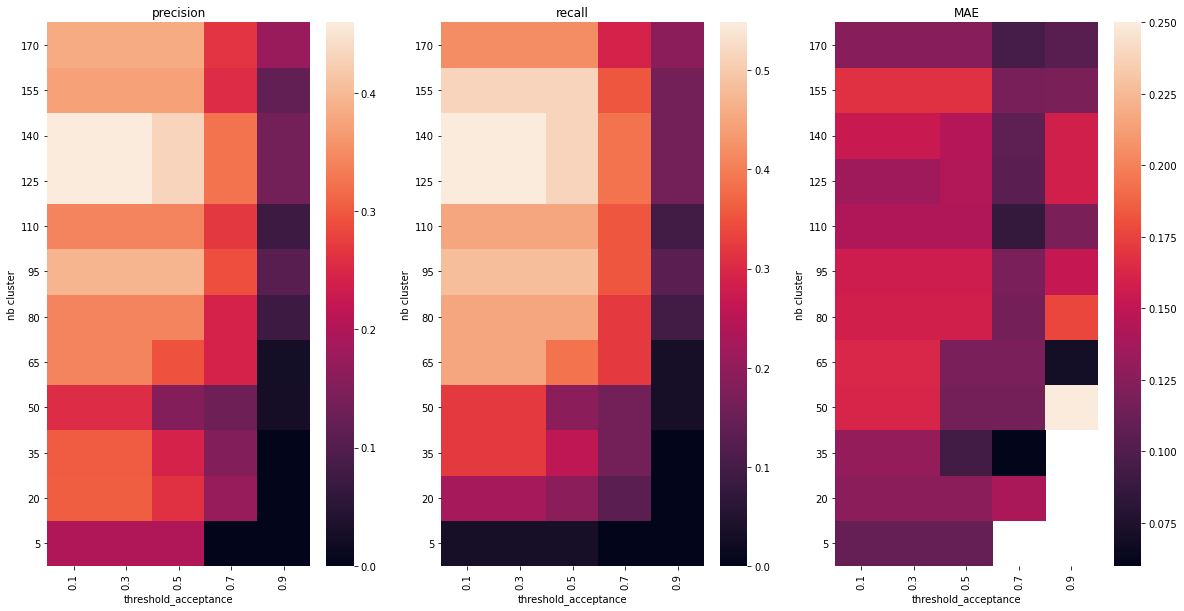

In [155]:
# Results no agregation

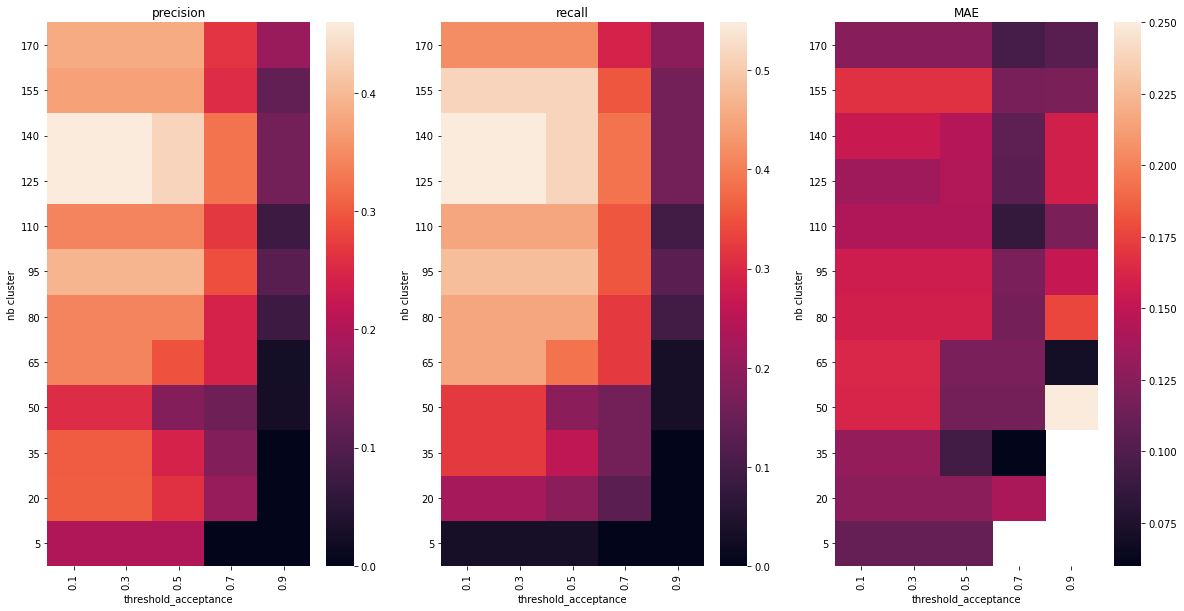

In [210]:
# Result medium granulairyt

import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap(to_plot_df, metric, subplot_idx):
    prec = to_plot_df.pivot(index='nb cluster', columns='threshold_acceptance', values=metric)
    plt.subplot(1, 3, subplot_idx)
    ax = sns.heatmap(prec)

    # turn the axis label
    for item in ax.get_yticklabels():
        item.set_rotation(0)

    for item in ax.get_xticklabels():
        item.set_rotation(90)

    ax.invert_yaxis()

    ax.set_title(metric)
    
plt.figure(figsize=(20,10))
plot_heatmap(to_plot_df, "precision", 1)

plot_heatmap(to_plot_df, "recall", 2)

plot_heatmap(to_plot_df, "MAE", 3)

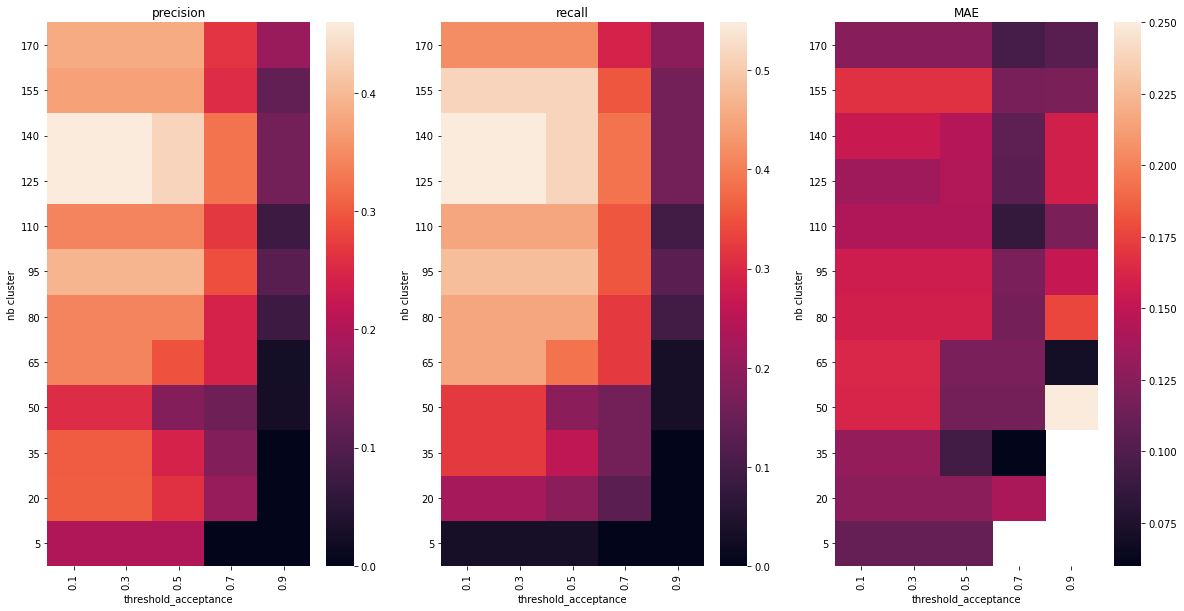

In [242]:
# With maximum aggregation

import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap(to_plot_df, metric, subplot_idx):
    prec = to_plot_df.pivot(index='nb cluster', columns='threshold_acceptance', values=metric)
    plt.subplot(1, 3, subplot_idx)
    ax = sns.heatmap(prec)

    # turn the axis label
    for item in ax.get_yticklabels():
        item.set_rotation(0)

    for item in ax.get_xticklabels():
        item.set_rotation(90)

    ax.invert_yaxis()

    ax.set_title(metric)
    
plt.figure(figsize=(20,10))
plot_heatmap(to_plot_df, "precision", 1)

plot_heatmap(to_plot_df, "recall", 2)

plot_heatmap(to_plot_df, "MAE", 3)

(200, 517)
(200, 196)
(200, 196)


[('predicted_label', 1.0), ('true_label', 0.95), ('[8]', 0.74), ('[23]', 0.63), ('[5, 8]', 0.63), ('[25]', 0.62), ('[8, 37]', 0.61), ('[6, 23]', 0.59), ('[8, 33]', 0.48), ('[18]', 0.48), ('[5, 23]', 0.44), ('[5, 25]', 0.44), ('[25, 37]', 0.41), ('[8, 10]', 0.39), ('[23, 37]', 0.34), ('[7]', 0.33), ('[7, 37]', 0.33), ('[13]', 0.31), ('[5, 8, 9]', 0.3), ('[5]', 0.27), ('[37]', 0.25), ('[8, 39]', 0.25), ('[16]', 0.24), ('[5, 23, 25]', 0.24), ('[5, 8, 37]', 0.23), ('[1, 37]', 0.23), ('[8, 25]', 0.22), ('[20]', 0.22), ('[13, 25]', 0.22), ('[34]', 0.21), ('[8, 28]', 0.21), ('[18, 37]', 0.21), ('[5, 25, 37]', 0.21), ('[5, 37]', 0.2), ('[3, 25, 37]', 0.2), ('[13, 25, 37]', 0.19), ('[9]', 0.19), ('[3]', 0.19), ('[3, 8, 33]', 0.19), ('[3, 37]', 0.19), ('[7, 25, 37]', 0.19), ('[18, 25, 37]', 0.18), ('[23, 39]', 0.18), ('[19]', 0.18), ('[18, 23, 37]', 0.17), ('[5, 20]', 0.17), ('[14, 23]', 0.17), ('[16, 28]', 0.17)]


0.25806451612903225
0.26666666666666666
0.205


Intersection
["['sauce']", "['trees']", "['shirt']", "['grass']", "['water']", "['mouth', 'shark']", "['claw', 'lobster']", "['leg', 'lobster']"]
8
Not intersection
45
Not in intersection and in GT
{"['pot']", "['oil']", "['elastic']", "['shark', 'stomach']", "['background']", "['net']", "['nose', 'shark']", "['body', 'lobster']", "['trout', 'wing']", "['head', 'lobster']", "['body', 'shark']", "['eye']", "['head', 'shark']", "['plate']", "['shark', 'wing']", "['body', 'trout']", "['shellfish']", "['fingers']", "['neck']", "['head', 'trout']", "['face']", "['lemon']"}
Not in intersection and in pred
{"['lobster']", "['trout', 'water']", "['grass', 'water']", "['shark']", "['leg', 'shark']", "['leg', 'lobster', 'trout']", "['grass', 'shark']", "['grass', 'leg', 'shark']", "['claw', 'shark']", "['leg']", '[\'shark\', "{\'scales\'}"]', "['neck', 'shark']", "['shark', 'trout']", "['leg', 'trout']", "['grass', 'trout']", "['body']", "['leg', 'neck', 'shark']", "['grass', 'leg', 'trout']", "

In [ ]:
all_representation_df.groupby(["true_label", "tail"]).size()



In [ ]:
ground_truth_features, ground_truth_cramers_values = compute_statistical_tests(all_representation_df, print_test_values=False, representation_values='binary')
prediction_features_cramers_values = [item for item in sorted(zip(ground_truth_features, ground_truth_cramers_values), key=lambda pair: pair[1], reverse=True)]
    

In [ ]:
prediction_features_cramers_values

In [199]:
ground_truth_features_cramers_values

[('trout_body', 0.93),
 ('lobster_claw', 0.84),
 ('water', 0.73),
 ('lobster_body', 0.71),
 ('lobster_head', 0.65),
 ('trout_head', 0.64),
 ('human_body_part', 0.63),
 ('shark_body', 0.61),
 ('shark_head', 0.53),
 ('lobster_leg', 0.52),
 ('background', 0.51),
 ('shark_wing', 0.51),
 ('trout_wing', 0.5),
 ('food', 0.49),
 ('grass', 0.47),
 ('table_tool', 0.44),
 ('trees', 0.4),
 ('clothe', 0.38),
 ('shark_mouth', 0.36),
 ('shark_stomach', 0.35),
 ('human_hand', 0.31),
 ('shark_nose', 0.23),
 ('eye', 0.22),
 ('elastic', 0.21),
 ('lemon', 0.21),
 ('fishing_tool', 0.21),
 ('fish_body', 0.18),
 ('lobster_inside', 0.17)]

In [358]:
filter_cramer_value = 0.0


    
prediction_features = []
prediction_features_dict = {}
for feat_tuple in prediction_features_cramers_values:
    if feat_tuple[1] > filter_cramer_value:
        prediction_features.append(feat_tuple[0])
        prediction_features_dict[feat_tuple[0]] = feat_tuple[1]
        
ground_truth_features = []
ground_truth_features_dict = {}
for feat_tuple in ground_truth_features_cramers_values:
    if feat_tuple[1] > filter_cramer_value:
        ground_truth_features.append(feat_tuple[0])
        ground_truth_features_dict[feat_tuple[0]] = feat_tuple[1]

In [361]:
from utils import precision, recall,  compute_MAE
print(precision(prediction_features, ground_truth_features))
print(recall(prediction_features, ground_truth_features))
print(compute_MAE(prediction_features_dict, ground_truth_features_dict))

0.0
0.0
nan


0.1724137931034483
0.29411764705882354
0.17555555555555558


In [365]:
pred1

[{'shark'},
 {'water'},
 {'claw', 'lobster'},
 {18, 'shark'},
 {18, 'trout'},
 {44, 'trout'},
 {'lobster'},
 {18, 'lobster'},
 {'leg', 'lobster'},
 {2, 'shark'},
 {'shark', 'stomach'},
 {44, 'shark'},
 {'lobster'},
 {'mouth', 'shark'},
 {'grass'},
 {'stomach', 'trout'},
 {8},
 {'trees'},
 {'eye', 'shark'},
 {26},
 {26, 'face'},
 {'face'},
 {'stomach'},
 {93},
 {18, 'lobster'},
 {35},
 {'lobster', 'stomach'},
 {71, 'shark'},
 {44},
 {18, 62, 'trout'},
 {'shark', 'wing'},
 {11},
 {11, 44, 'shark'},
 {71, 'trout'},
 {35, 'water'},
 {'shark', 'water'},
 {18, 26, 'trout'},
 {18},
 {44, 'lobster'},
 {'lobster', 'stomach'},
 {24},
 {18, 8, 'trout'},
 {18, 62},
 {18, 44, 'trout'},
 {'eye', 'water'},
 {106, 44, 'shark'},
 {18, 35, 'trout'},
 {18, 'hand', 'trout'},
 {2, 84, 'shark'},
 {'face', 'shark'},
 {113},
 {'leg', 'trout'},
 {42},
 {44, 84},
 {'eye', 'lobster'},
 {'leg', 'lobster'},
 {59, 'lobster'},
 {18, 74}]

In [366]:
GT1


[{'body', 'trout'},
 {'claw', 'lobster'},
 {'water'},
 {'body', 'lobster'},
 {'head', 'lobster'},
 {'face'},
 {'head', 'trout'},
 {'body', 'shark'},
 {'head', 'shark'},
 {'leg', 'lobster'},
 {'background'},
 {'shark', 'wing'},
 {'trout', 'wing'},
 {'grass'},
 {'trees'},
 {'shirt'},
 {'plate'},
 {'mouth', 'shark'},
 {'neck'},
 {'shark', 'stomach'},
 {'oil'},
 {'fingers'},
 {'net'},
 {'nose', 'shark'},
 {'eye'},
 {'pot'},
 {'elastic'},
 {'lemon'},
 {'sauce'},
 {'shellfish'},
 {'hand'},
 {'body', 'fish'},
 {'corn'},
 {'inside', 'lobster'}]

TypeError: unhashable type: 'set'